<div style="text-align:left">

### Multilingual Culinary Chatbot: Multilingual Recipe Recommendation Chatbot Based on Ingredients

#### Mt. SAC CISB 63 Final Project Fall 2023

#### Vedavit Shetty
    
</div>

The Multilingual Culinary Chatbot redefines the recipe recommendation experience by leveraging the analytical prowess of NLP techniques. It intricately processes user-provided ingredients using spaCy's sophisticated NER for precise identification, complemented by NLTK's tokenization and POS tagging for a deeper linguistic analysis. By employing a TF-IDF vectorization approach alongside cosine similarity, the chatbot adeptly surfaces the most pertinent recipes. Its multilingual capacity, actualized through TextBlob, enriches this culinary voyage, offering recipe translations that cater to a global audience.

Github Publication: https://github.com/vedavitshetty/Multilingual-Culinary-Chatbot

In [1]:
#ignore warnings:
import warnings
warnings.filterwarnings("ignore")
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [2]:
#!pip install WordCloud

# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.chunk import ne_chunk
import re
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# download stopwords, punkt, and averaged_perceptron_tagger, maxent_ne_chunker, and words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
recipes = pd.read_csv('recipes.csv', index_col=0)

In [4]:
recipes

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...
13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten..."
13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s..."
13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...
13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...


# Exploratory Data Analysis (EDA)

Check for missing or null values and handle it

In [5]:
recipes.isnull().sum()

Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [6]:
recipes.dropna(inplace=True)

Inspect the Data

In [7]:
recipes.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13493,13493,13493,13493,13493
unique,13302,13471,13464,13464,13471
top,Potato Latkes,[],Place ingredients in blender in the order list...,#NAME?,['']
freq,5,6,5,30,6


Drop the rows where the ingredients are not listed

In [8]:
# Filter out rows where Cleaned_Ingredients is "[]"
recipes = recipes[recipes['Ingredients'] != '[]']

In [9]:
recipes.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13487,13487,13487,13487,13487
unique,13296,13470,13458,13458,13470
top,French 75,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...",Place ingredients in blender in the order list...,#NAME?,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey..."
freq,5,4,5,30,4


Data looks good, let's continue to inspect the data

In [10]:
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [11]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13487 entries, 0 to 13500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13487 non-null  object
 1   Ingredients          13487 non-null  object
 2   Instructions         13487 non-null  object
 3   Image_Name           13487 non-null  object
 4   Cleaned_Ingredients  13487 non-null  object
dtypes: object(5)
memory usage: 632.2+ KB


#### Visualizations

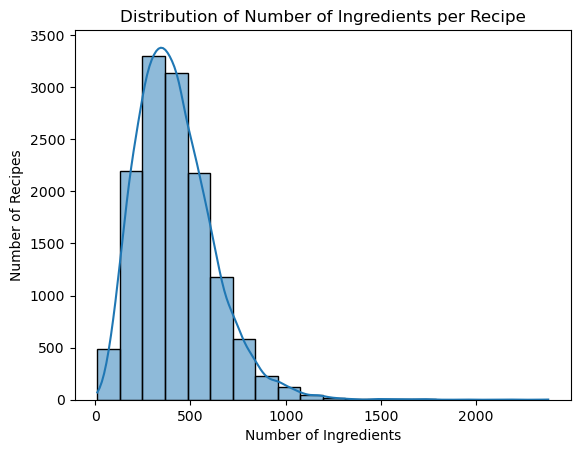

In [12]:
# Distribution of Number of Ingredients per Recipe
recipes['num_ingredients'] = recipes['Ingredients'].apply(len)
sns.histplot(recipes['num_ingredients'], bins=20, kde=True)
plt.title('Distribution of Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()

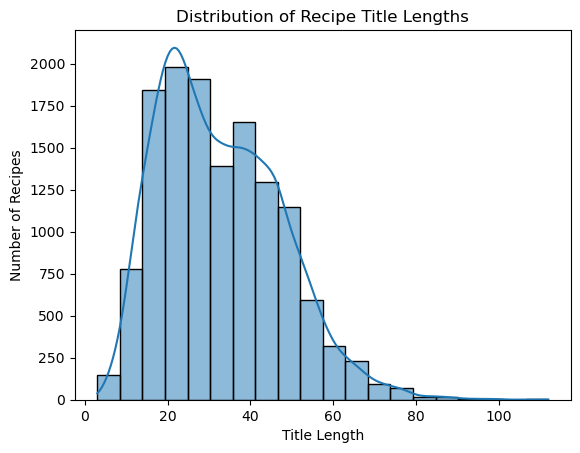

In [13]:
# Recipe Title Lengths
recipes['title_length'] = recipes['Title'].apply(len)
sns.histplot(recipes['title_length'], bins=20, kde=True)
plt.title('Distribution of Recipe Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Number of Recipes')
plt.show()

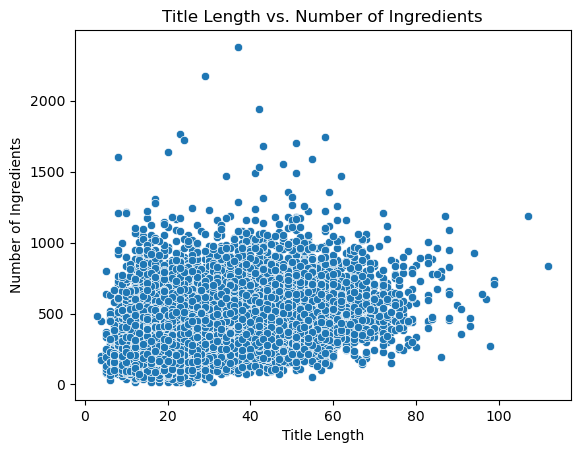

In [14]:
sns.scatterplot(x=recipes['title_length'], y=recipes['num_ingredients'])
plt.title('Title Length vs. Number of Ingredients')
plt.xlabel('Title Length')
plt.ylabel('Number of Ingredients')
plt.show()

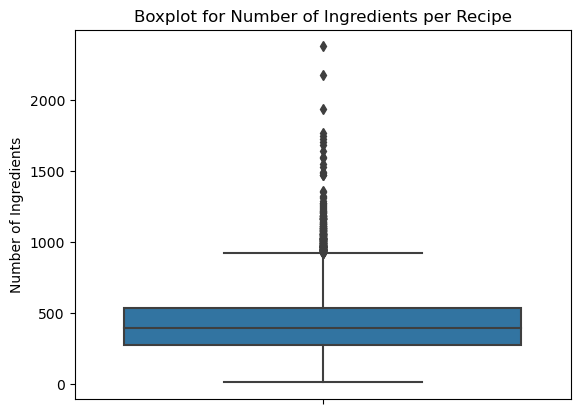

In [15]:
sns.boxplot(y=recipes['num_ingredients'])
plt.title('Boxplot for Number of Ingredients per Recipe')
plt.ylabel('Number of Ingredients')
plt.show()

Some analysis:
- 75% of recipes have about 600 or less ingredients with the middle 50% containing about 100 to 600 ingredients
- There's not a strong correlation between recipe title and number of ingredients
- The distribution for recipe title lengths appears to be normally distributed around 20 to 40 characters.

# Apply NLP Techniques to preprocess the data

Removing Stopwords and Lowercasing

In [16]:
stop = set(stopwords.words('english'))

recipes['Cleaned_Ingredients'] = recipes['Cleaned_Ingredients'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]))
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12


Tokenization

In [17]:
recipes['Tokenized_Ingredients'] = recipes['Cleaned_Ingredients'].apply(word_tokenize)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ..."


POS (Part-of-Speech) Tagging

In [18]:
recipes['POS_Tagged_Ingredients'] = recipes['Tokenized_Ingredients'].apply(nltk.pos_tag)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients,POS_Tagged_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',...","[([, NN), (', ''), (1, CD), ((, (), (3½–4-lb, ..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun...","[([, NN), (', ''), (2, CD), (large, JJ), (egg,..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c...","[([, NN), (', ''), (1, CD), (cup, NNS), (evapo..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l...","[([, NN), (', ''), (1, CD), ((, (), (¾-, JJ), ..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ...","[([, NN), (', ''), (1, CD), (teaspoon, NN), (d..."


Word Cloud

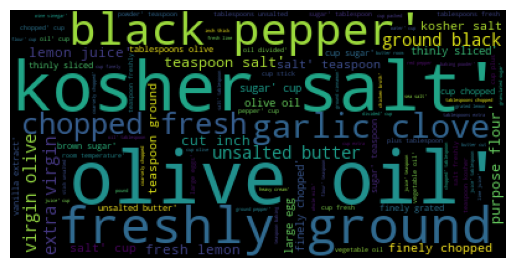

In [19]:
from wordcloud import WordCloud

text = ' '.join(recipes['Cleaned_Ingredients'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Frequency Distribution

In [20]:
all_words = ' '.join(recipes['Cleaned_Ingredients']).split()
fdist = FreqDist(all_words)
fdist.most_common(10)

[("'1", 37955),
 ('cup', 28116),
 ("'2", 21701),
 ('teaspoon', 15987),
 ('tablespoons', 15543),
 ("'1/2", 13440),
 ('fresh', 10109),
 ('cups', 10075),
 ("'1/4", 9645),
 ('1/2', 9173)]

NER (Named Entity Recognition)

In [21]:
# NER (Named Entity Recognition) Function
# This function identifies notable entities within the given text.
# Specifically, it searches for Geopolitical entities (GPE), Personal names (PERSON), and Organizations (ORGANIZATION).
def named_entity_recognition(text):
    tree = ne_chunk(nltk.pos_tag(word_tokenize(text)))
    named_entities = []
    for subtree in tree.subtrees():
        if subtree.label() in ['GPE', 'PERSON', 'ORGANIZATION']:
            entity = " ".join([word for word, tag in subtree.leaves()])
            named_entities.append(entity)
    return named_entities

# Get the NER for the first 100 recipes
Named_Entities = recipes['Instructions'].head(100).apply(named_entity_recognition)
Named_Entities

0     [Pat, Cut, Sprinkle, Set, Place, Pat, Place, T...
1                                                    []
2                                [Cook, Sprinkle, Bake]
3                                 [Brown, Whisk, Cooks]
4                                       [Shake, Strain]
                            ...                        
95    [Purée, Season, Mash, Cook, Toss, Sprinkle, Se...
96    [Cook, Set, Scrape, Pulse, Chill, Scrape, Spri...
97                                          [Carefully]
98               [Pat, Cook, Turn, Whisk, Dollop, Bake]
99                         [Whisk, Arrange, Cook, Tear]
Name: Instructions, Length: 100, dtype: object

Translation

In [22]:
# Translation Function
# This function translates the given text into the specified target language using the TextBlob library.
# If the translation fails for any reason, it returns the original text.
def translate_text(text, target_lang='es'):
    try:
        blob = TextBlob(text)
        return blob.translate(from_lang='en', to=target_lang).string
    except:
        return text

# Applying the translation function to the first 100 titles in the recipes dataframe, translating to Spanish as an example
spanish_recipe_title = recipes['Title'].head(100).apply(lambda x: translate_text(x, 'es'))
spanish_recipe_title

0     Pollo asado miso-mordido con squash bellota pa...
1                  Patatas crujientes de sal y pimienta
2                      Acción de Gracias Mac and Cheese
3                   Salchicha italiana y relleno de pan
4                                         Ley de Newton
                            ...                        
95          Tazones de maíz y garbanzos con miso tahini
96                    Tarta de crema de fruta de piedra
97    Plátanos Hornados con crema y queso (plátano h...
98              Tamale pastel con tomate y maíz frescos
99    Panzanella en el camino carbonizado con vinagr...
Name: Title, Length: 100, dtype: object

In [23]:
# Applying the translation function to the first 100 instructions in the recipes dataframe
spanish_recipe_instructions = recipes['Instructions'].head(100).apply(lambda x: translate_text(x, 'es'))
spanish_recipe_instructions

0     Pase el pollo seco con toallas de papel, sazon...
1     Precaliente el horno a 400 ° F y línea una ban...
2     Coloque una rejilla en el medio del horno; Pre...
3     Precaliente el horno a 350 ° F con rejilla en ...
4     Revuelva el azúcar morena y el agua caliente e...
                            ...                        
95    Purée jalapeños, jengibre, ajo, cilantro, jugo...
96    Precaliente un horno a 375 ° F. Cocine la mant...
97    Precaliente el horno a 400 ° F.\nColoque los p...
98    Precaliente el horno a 450 ° F. Calienta una s...
99    Batir ajo, salmuera, mostaza y sal en un tazón...
Name: Instructions, Length: 100, dtype: object

Subjectivity

In [24]:
# Subjectivity Analysis Function
# This function returns the subjectivity score of the given text.
# The score ranges from 0 (objective) to 1 (subjective).
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

recipes['Instructions_Subjectivity'] = recipes['Instructions'].apply(get_subjectivity)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients,POS_Tagged_Ingredients,Instructions_Subjectivity
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',...","[([, NN), (', ''), (1, CD), ((, (), (3½–4-lb, ...",0.477054
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun...","[([, NN), (', ''), (2, CD), (large, JJ), (egg,...",0.529365
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c...","[([, NN), (', ''), (1, CD), (cup, NNS), (evapo...",0.285629
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l...","[([, NN), (', ''), (1, CD), ((, (), (¾-, JJ), ...",0.375905
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ...","[([, NN), (', ''), (1, CD), (teaspoon, NN), (d...",0.750000


TF-IDF Weighting & Matrix Creation

In [25]:
# Applying Term Frequency-Inverse Document Frequency (TF-IDF) technique to convert text data into numerical format.
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, preprocessor=lambda x: x)
matrix = vectorizer.fit_transform(recipes['Tokenized_Ingredients'])


Cosine Similarity

In [26]:
# Function to compute cosine similarity between user's input ingredients and the recipes in the dataset.
def compute_cosine_similarity(user_tokens):
    user_vector = vectorizer.transform([user_tokens])
    cosine_scores = cosine_similarity(user_vector, matrix)
    recipes['cosine_score'] = cosine_scores[0]
    return recipes

Extract Ingredients with Spacy

In [27]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm") 

def parse_ingredients_with_spacy(user_input):
    doc = nlp(user_input)
    ingredients = [ent.text for ent in doc.ents if ent.label_ == "FOOD"]
    return ingredients

Recipe Recommendation Function

In [28]:
# Function to recommend the top recipes based on the ingredients provided by the user.
def recommend_recipes(user_ingredients):
    # Feedback message
    print("Let me find some recipes for you...")

    # Convert user ingredients to tokens
    user_tokens = [ingredient.lower().strip() for ingredient in user_ingredients.split(',')]
    
    # Compute cosine similarity scores for recipes
    compute_cosine_similarity(user_tokens)
    
    # Calculate count of exact ingredient matches
    recipes['match_count'] = recipes['Tokenized_Ingredients'].apply(lambda x: sum(1 for token in user_tokens if token in x))
    
    # Return top 5 recipes with highest match count and then highest cosine similarity scores
    top_recipes = recipes.sort_values(by=['match_count', 'cosine_score'], ascending=[False, False]).head(5)
    return top_recipes[['Title', 'Ingredients', 'Instructions']]

In [34]:
# Function to display the recommended recipes to the user in a structured format.
def display_recommendations(user_input):
    # Get the recommended recipes
    recommended = recommend_recipes(user_input)

    if recommended.empty:
        print("I couldn't find any recipes with those ingredients. Try different ones?")
        return

    print(f"Here are some recipes I found for you:")

    # Display each recipe
    for index, row in recommended.iterrows():
        print("\n---\n")
        print(f"Recipe {index + 1}: {row['Title']}")
        print(f"Ingredients: {row['Ingredients']}")
        print(f"Instructions: {row['Instructions']}")
    
    print("\n---\n")


Test the Refined Recommendation System

In [36]:
while True:
    user_input = input("\nEnter the ingredients you have (comma-separated), or type 'exit' to quit: ")
    if user_input.lower() == 'exit':
        print("Goodbye! Happy cooking!")
        break
    display_recommendations(user_input)
    # Ask if the user wants to continue or not
    continue_choice = input("Would you like to search for more recipes (Yes/No)? ")
    if continue_choice.lower() not in ['yes', 'y']:
        print("Thank you for using the Culinary Matcher. Have a great day!")
        break


Enter the ingredients you have (comma-separated), or type 'exit' to quit: Chicken, anchovies
Let me find some recipes for you...
Here are some recipes I found for you:

---

Recipe 6385: Rigatoni with Roasted Broccoli and Chickpeas
Ingredients: ['1 can (2 ounces) anchovies packed in oil, chopped, oil reserved', '4 cloves garlic, chopped', '1 can (15.5 ounces) chickpeas (liquid reserved), rinsed and drained', '1 chicken bouillon cube', '1 pound broccoli, cut into small florets', '1/2 pound whole-wheat rigatoni', '1/2 cup grated Romano']
Instructions: Heat oven to 450°F. In a small saucepan over medium-high heat, sauté anchovies with oil and garlic until anchovies dissolve and garlic browns. Add chickpea liquid and bouillon to anchovies; cook, stirring, until bouillon dissolves. Pour anchovy mixture into roasting pan; add chickpeas and broccoli; stir to coat. Roast 20 minutes. Cook rigatoni as directed on package until al dente. Drain rigatoni, reserving 1 cup cooking liquid. Add pasta 

Would you like to search for more recipes (Yes/No)? Yes

Enter the ingredients you have (comma-separated), or type 'exit' to quit: Chicken, Fish
Let me find some recipes for you...
Here are some recipes I found for you:

---

Recipe 1138: Summer Salad with Lemon Dijon Dressing
Ingredients: ['2 cups chopped fresh spinach', '1/4 cup chopped asparagus', '1/2 cup chopped red and orange bell pepper', '2 tablespoons fresh corn kernels', '2 tablespoons chopped fresh basil leaves', '1/4 avocado', '4 ounces grilled tofu, chicken, or fish', 'Lemon Dijon Dressing Recipe']
Instructions: In a bowl, toss together all the ingredients until everything is well coated with the dressing, then serve.

---

Recipe 2532: Vietnamese Chicken Soup With Rice
Ingredients: ['2 skinless, boneless chicken thighs', '1 (4x4-inch) piece dried kombu', '1 (2-inch) piece ginger, peeled, crushed', '3 star anise pods', '1 (2-inch) cinnamon stick', '2 whole cloves', '4 cups chicken stock or low-sodium chicken broth', '1 cup

In [41]:
# Function to display the recommended recipes translated into the user's preferred language.
def display_recommendations_in_different_languages(user_input, language='English', language_code='en'):
    # Get the recommended recipes
    recommended = recommend_recipes(user_input)

    if recommended.empty:
        print("I couldn't find any recipes with those ingredients. Try different ones?")
        return

    print(f"Here are some recipes I found for you in {language}:")

    # Display each recipe
    for index, row in recommended.iterrows():
        print("\n---\n")
        print(f"Recipe {index + 1}: {translate_text(row['Title'], language_code)}")
        print(f"Ingredients: {translate_text(row['Ingredients'], language_code)}")
        print(f"Instructions: {translate_text(row['Instructions'], language_code)}")
    
    print("\n---\n")


In [42]:
# Dictionary to map language names to codes
language_codes = {
    'english': 'en',
    'spanish': 'es',
    'german': 'de',
    'french': 'fr',
    'italian': 'it',
    'portuguese': 'pt',
    'dutch': 'nl',
    'russian': 'ru',
    'japanese': 'ja',
    'chinese': 'zh',
    # Add more languages and their codes as necessary
}

def get_language_code(language_name):
    # Convert to lowercase and strip any extra whitespace
    language_name = language_name.lower().strip()
    return language_codes.get(language_name, 'en')  # Default to English if not found

In [44]:
while True:
    # Get user input for ingredients
    user_ingredients = input("\nEnter the ingredients you have (comma-separated), or type 'exit' to quit: ")
    if user_ingredients.lower() == 'exit':
        print("Goodbye! Happy cooking!")
        break

    # Get user input for language preference
    language_name = input("Which language would you like the recipes in? (English, Spanish, German, etc.): ")
    language_code = get_language_code(language_name)

    # Call the function to display recommendations in the chosen language
    display_recommendations_in_different_languages(user_ingredients, language_name.capitalize(), language_code)

    # Ask if the user wants to continue or not
    continue_choice = input("Would you like to search for more recipes (Yes/No)? ")
    if continue_choice.lower() not in ['yes', 'y']:
        print("Thank you for using the Culinary Matcher. Have a great day!")
        break


Enter the ingredients you have (comma-separated), or type 'exit' to quit: Chicken, Lemon, Garlic
Which language would you like the recipes in? (English, Spanish, German, etc.): English
Let me find some recipes for you...
Here are some recipes I found for you in English:

---

Recipe 1399: Lentil and Chicken Soup with Sweet Potatoes and Escarole
Ingredients: ['1 cooked chicken carcass (from 1 store-bought rotisserie chicken or homemade roast chicken)', '1 lb. sweet potatoes (about 2 medium), peeled, cut into 1" pieces', '3/4 cup French lentils (about 5 oz.), rinsed', '1 tsp. kosher salt, plus more', '2 Tbsp. extra-virgin olive oil', '10 celery stalks, sliced on the bias into 1/4" slices', '6 garlic cloves, thinly sliced', '1 1/2 cups shredded cooked chicken (from 1/2 of a store-bought rotisserie chicken or homemade roast chicken)', '1/2 head escarole, cut into bite-size pieces', '1/2 cup finely chopped dill', '2 Tbsp. fresh lemon juice']
Instructions: Place chicken carcass, potatoes, l

Instructions: Batir los primeros 6 ingredientes en un tazón pequeño. Sazone al gusto con pimienta negra recién molida. Vierta la marinada en una bolsa de plástico resellable de 1 galón; Agregue pollo y selle. Gire la bolsa para cubrir el pollo. Marinar a temperatura ambiente 30 minutos o en refrigerador hasta 2 días, girando ocasionalmente.
Prepare la barbacoa (a fuego medio-alto). Coloque el pollo, con un poco de marinada que aún se aferra, en la rejilla de la parrilla; Asa el pollo hasta que esté bien cocido y dorado por todos los lados, girando con frecuencia, aproximadamente 30 minutos. Transferir a platos y servir.

---

Recipe 10963: Pierras de pollo asadas con limón y tomillo
Ingredients: ['4 patas de pollo enteros o 4 muslos de pollo y 4 baquetas (2 1/2 a 3 libras en total)', '3 cucharadas de aceite de oliva virgen extra', '5 (3 a 4 pulgadas) ramitas frescas', tomas frescas ', '2 dientes de ajo, destrozado', '3/4 cucharadita de sal', '1/2 cucharadita de pimienta negra', '4 (1/4

### Summary 
Key phases of the project's development include:

- Exploratory Data Analysis (EDA): Initiated with rigorous data cleansing, followed by visualization to distill the dataset's core attributes.
- Natural Language Processing (NLP): The application of spaCy for precise NER and NLTK for foundational NLP tasks such as tokenization and POS tagging has created a robust analytical framework. The creation of a Word Cloud has visually captured the essence of prevalent ingredients.
- Visualization: Advanced through the creation of histograms and scatter plots, these visual aids render the data's complex patterns more accessible.
- Translation: Leveraged TextBlob for its initial multilingual support, the system transcends linguistic barriers, making culinary discovery universally accessible.
- Recommendation System: Anchored by TF-IDF vectors and cosine similarity, it meticulously aligns user preferences with the culinary database.
- Interactive Testing: The chatbot's user interface facilitates a seamless interaction, soliciting ingredient inputs and dispensing recipes in a multitude of languages, with an emphasis on English, Spanish, and Japanese.

### Conclusion
The Multilingual Culinary Chatbot embodies a seamless fusion of culinary insight and technological innovation, empowering users to transform available ingredients into extraordinary meals. It accentuates recipe relevance through its multilingual capabilities, broadening its appeal to a diverse international user base. Poised for future growth, the chatbot's modular design is ready to accommodate expanded language options, personalized culinary recommendations, and potential e-commerce linkages for a complete from-pantry-to-plate experience.